# Fit RTs - AI and EA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import pickle
from scipy import integrate
from numba import jit

from psiam_utils import rho_A_t_arr_fn, rho_E_t_arr_fn, cum_A_t_arr_fn, cum_E_t_arr_fn

In [2]:
with open('psiam_data_5k.pkl', 'rb') as f:
    psiam_data = pickle.load(f)


choices = psiam_data['choices']
RTs = psiam_data['RTs']
is_act_resp = psiam_data['is_act_resp']
V_A = psiam_data['V_A']
theta_A = psiam_data['theta_A']
V_E = psiam_data['V_E']
theta_E = psiam_data['theta_E']


indices_evid = np.where(is_act_resp == 0)[0]
RTs_evid = RTs[indices_evid]

indices_act = np.where(is_act_resp == 1)[0]
RTs_act = RTs[indices_act]

# Fitting AI

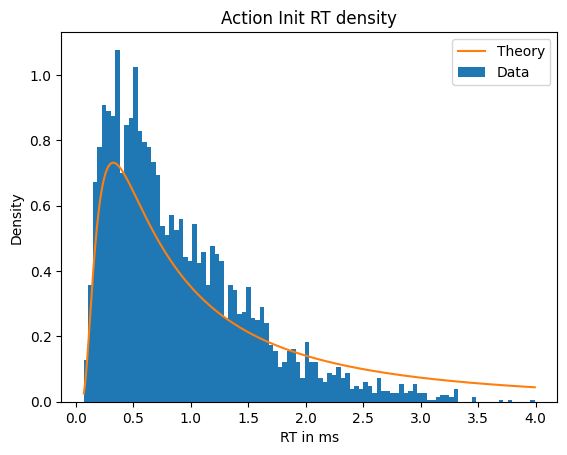

In [3]:
RTs_act_flat = RTs_act.flatten()
t_pts = np.linspace(min(RTs_act_flat), max(RTs_act_flat), 1000)

rho_t_A_theory = rho_A_t_arr_fn(t_pts, V_A, theta_A)

plt.hist(RTs_act_flat, density=True, bins=100);
plt.plot(t_pts, rho_t_A_theory);
plt.xlabel('RT in ms'); plt.ylabel('Density')
plt.title('Action Init RT density'); plt.legend(['Theory', 'Data']);

# Fitting EA

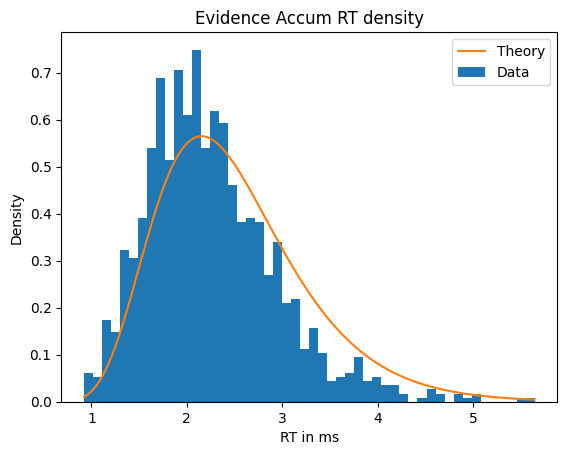

In [4]:
K_max = 50
RTs_evid = RTs_evid.flatten()
t_pts = np.linspace(min(RTs_evid), max(RTs_evid), 1000)

rho_t_E_theory = rho_E_t_arr_fn(t_pts, V_E, theta_E, K_max)

plt.hist(RTs_evid, density=True, bins=50);
plt.plot(t_pts, rho_t_E_theory);
plt.xlabel('RT in ms'); plt.ylabel('Density')
plt.title('Evidence Accum RT density'); plt.legend(['Theory', 'Data']);

# Testing Cummulative Distr

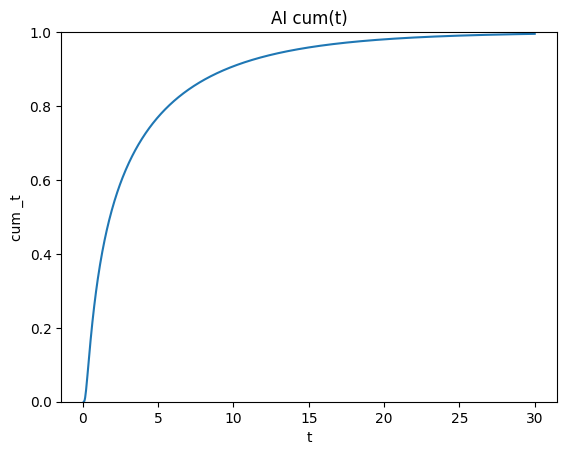

In [5]:
# AI  cum
t_pts = np.linspace(min(RTs_act), 30, 1000)
cum_A_t_theory = cum_A_t_arr_fn(t_pts, V_A, theta_A)

plt.plot(t_pts, cum_A_t_theory)
plt.ylim(0,1);plt.xlabel('t'); plt.ylabel('cum _t');plt.title('AI cum(t)');

Text(0.5, 1.0, 'Numeric')

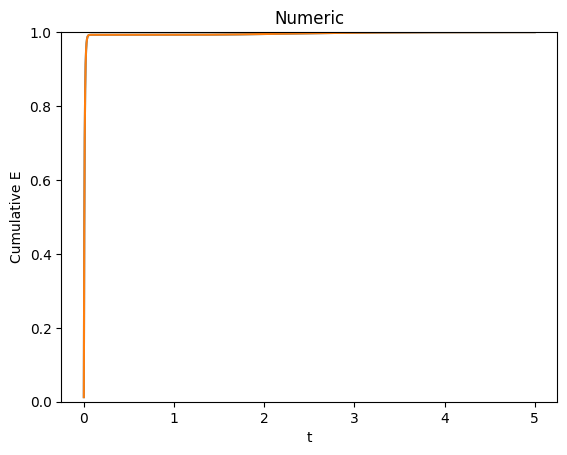

In [9]:
# EA cum
K_max = 50
t_pts = np.linspace(0.0001, 5, 1000)
cum_E_t_theory = cum_E_t_arr_fn(t_pts, V_E, theta_E, K_max)
plt.plot(t_pts, cum_E_t_theory); plt.xlabel('t'); plt.ylabel('EA c(t)'); plt.title('EA');
plt.ylim(0,1);



Text(0.5, 1.0, 'Numeric')

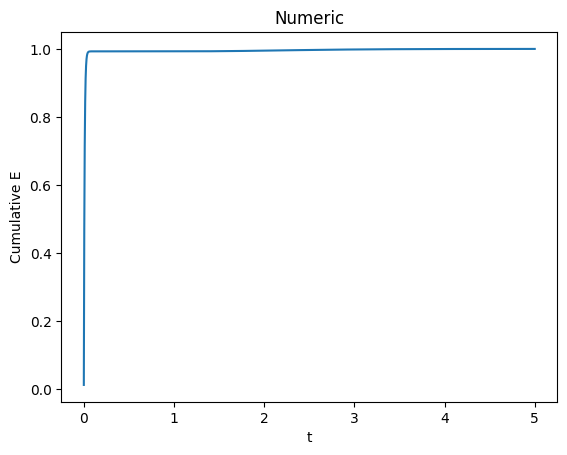

In [10]:
from psiam_utils_2 import cdf_E_both_bounds
cum_E = [cdf_E_both_bounds(t, V_E, theta_E, K_max) for t in t_pts]
plt.plot(t_pts, cum_E); plt.xlabel('t'); plt.ylabel('Cumulative E'); plt.title('Numeric')

# Fit both

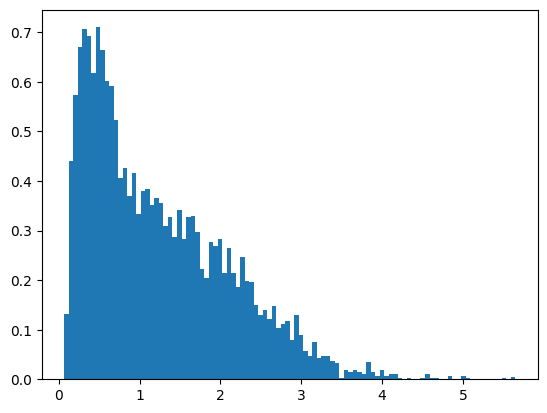

In [7]:
RTs_flat = RTs.flatten()



plt.hist(RTs, density=True, bins=100);